# Data Cleaning

This notebook clean the data to prepare it for the analysis. The cleaned data is then save to df_clean.csv

We will do the follows. 

1. Remove variables(columns) that has more than 70% of NaN value

2.  Handle categorical values with too many categories: pt_state, ecodub92 and diag_adm:  We will find a reasonable way to group these categories into fewer categories. 

3. Save the data to df_clean.csv
 

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../df.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,8,9,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. Remove variables 

We remove variables that has more than 70% of missing values. 

In [4]:
DROP_LIMIT = 0.7
for var in df.columns:
    if df[var].isna().sum()/df[var].count() > DROP_LIMIT:
        df.drop(var, axis=1, inplace=True)

In [5]:
orig_col = ['yod','age','sex','b_wt','ethnic','pt_state','race','raceethn','campus','er_mode','admtype', 'payer',
      'yoa','pay_ub92','provider','asource','ecodepoa','moa','service','ecodub92','diag_adm','los']

for c in orig_col:
    if c not in df.columns:
        print(c)

race
er_mode
ecodepoa


#### Removed columns:
* race
* er_mode
* ecodepoa

### 2. Handle pt_state

In [6]:
df['pt_state'].unique()

array([nan, "b'00'", "b'RI'", "b'CA'", "b'01'", "b'08'", "b'TX'", "b'CT'",
       "b'NH'", "b'02'", "b'NC'", "b'DE'", "b'YY'", "b'MA'", "b'NY'",
       "b'05'", "b'25'", "b'26'", "b'20'", "b'31'", "b'FL'", "b'11'",
       "b'06'", "b'18'", "b'PA'", "b'03'", "b'16'", "b'IL'", "b'10'",
       "b'13'", "b'21'", "b'07'", "b'09'", "b'LA'", "b'17'", "b'12'",
       "b'NE'", "b'ME'", "b'04'", "b'22'", "b'NJ'", "b'15'", "b'19'",
       "b'34'", "b'14'", "b'MI'", "b'MD'", "b'OR'", "b'NV'", "b'27'",
       "b'OH'", "b'GA'", "b'AK'", "b'53'", "b'E8'", "b'MO'", "b'IN'",
       "b'TN'", "b'VT'", "b'CO'", "b'AZ'", "b'VA'", "b'WI'", "b'KS'",
       "b'-2'", "b'SC'", "b'DC'", "b'30'", "b'V4'", "b'MN'", "b'UK'",
       "b'OK'", "b'V1'", "b'24'", "b'44'", "b'36'", "b'40'", "b'33'",
       "b'61'", "b'80'", "b'45'", "b'73'", "b'AL'", "b'HI'", "b'0-'",
       "b'XX'", "b'KY'", "b'E9'", "b'78'", "b'42'", "b'69'", "b'V0'",
       "b'74'", "b'23'", "b'-3'", "b'WV'", "b'VI'", "b'AR'", "b'UT'",
       "b'28'",

In [7]:
from collections import defaultdict

In [8]:
map_dict = defaultdict(lambda: 'Other')
map_dict["b'RI'"] = 'RI'
map_dict["b'CT'"] = 'CT'
map_dict["b'MA'"] = 'MA'

In [9]:
df['pt_state'] = df['pt_state'].map(map_dict, na_action='ignore').fillna('Unknown')

In [10]:
df['pt_state'].unique()

array(['Unknown', 'Other', 'RI', 'CT', 'MA'], dtype=object)

### 3. Handle ecodub92


In [11]:
df = df.drop(['ecodub92'], axis=1)

### 4. Handle diag_adm

In [12]:
# fill NA values with 'Unknown'
df['diag_adm'] = df['diag_adm'].fillna('Unknown')

# Keep the first three letters of the diagnosis (Categories of dianosis)
df['diag_adm'] = [i if i=='Unknown' else i[2:5] for i in df['diag_adm']]

# Group diagnosis codes with few values into Others
u = df['diag_adm'].value_counts()
v = u.index[u.values<5]
df['diag_adm'] = ['Others' if i in v else i for i in df['diag_adm']]

In [39]:
def f(x):
    r = pd.Series()
    r['Unique Values'] =  x.unique().__len__()
    missing_values = x.isna().sum()
    r['Missing'] = missing_values
    r['Missing Percentage'] =  missing_values/len(x)
    r['Type'] = x.dtype
    return(r)

In [14]:
u = df.apply(f, axis=0)
u.transpose()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Unique Values,Missing,Missing Percentage,Type
yod,16,0,0,float64
age,120,25,1.13046e-05,float64
sex,4,3,1.35655e-06,object
b_wt,4847,590017,0.266796,object
ethnic,6,285208,0.128966,float64
pt_state,5,0,0,object
raceethn,10,146005,0.0660211,object
campus,34,903208,0.408416,object
admtype,7,75,3.39138e-05,object
payer,18,0,0,object


### 5. Adding binary los

- If los < 14, los_binary = 0
- If los >= 14, los_binary = 1

In [15]:
df['los_binary'] = [0 if i<14 else 1 for i in df['los']]

### 6. Save the data

In [16]:
df.to_csv('../df_clean.csv', index=False)

<br>

### 7. Handle b_wt

In [8]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from random import random

In [2]:
df = pd.read_csv('../df_clean.csv')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['b_wt'].unique()

array([nan, "b'5382'", "b'8121'", ..., "b'358'", "b'8349'", "b'433X'"],
      dtype=object)

#### Things to consider:
* Need to handle weird structure
* Need to handle x's
    * For internal or trailing x's, will assume 5
    * For leading x's, finding probability distribution for digits, assuming will be like benford's law

In [14]:
def partial_transform(val):
    try:
        weight = re.findall("b'(\w*)'", val)
    except:
        print(val)
    if len(weight) > 1:
        print(f'{val}, {weight}')
    if len(weight) == 0:
        return np.nan
    return weight[0]

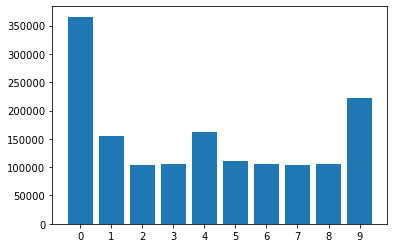

In [30]:
digit_counts = defaultdict(lambda: 0)
for n in partials.dropna():
    digit_counts[n[0]] +=1
digits = sorted(digit_counts.keys())
counts = [digit_counts[i] for i in digits]
plt.bar(digits, counts)
plt.show()

In [31]:
sorted_digits = {}
for i in digits:
    sorted_digits[i] = digit_counts[i] / sum(digit_counts.values())

In [32]:
def transform_b_wt(val):
    weight = re.findall("b'(\w*)'", val)
    if len(weight) > 1:
        print(f'{val}, {weight}')
    if len(weight) == 0:
        return np.nan
    ret_val = ''
    for i in range(len(weight[0])):
        try:
            int(weight[0][i])
            ret_val += weight[0][i]
        except:
            if i==0:
                seed = random()
                cdf = 0
                j = 0
                while cdf < seed:
                    cdf +=sorted_digits[str(i)]
                    i +=1
                ret_val +=str(i-1)
            else:
                ret_val +='5'
    return ret_val

In [33]:
test = df['b_wt'].map(transform_b_wt, na_action='ignore')

In [35]:
test.dropna().astype('int16').unique()

array([5382, 8121, 9655, ...,  358, 8349, 4335], dtype=int16)

In [36]:
df['b_wt'] = df['b_wt'].map(transform_b_wt, na_action='ignore')

In [40]:
def f(x):
    r = pd.Series()
    r['Unique Values'] =  x.unique().__len__()
    missing_values = x.isna().sum()
    r['Missing'] = missing_values
    r['Missing Percentage'] =  missing_values/len(x)
    r['Type'] = x.dtype
    return(r)

In [41]:
u = df.apply(f, axis=0)
u.transpose()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Unique Values,Missing,Missing Percentage,Type
yod,16,0,0,float64
age,120,25,1.13046e-05,float64
sex,4,3,1.35655e-06,object
b_wt,4803,671100,0.303461,object
ethnic,6,285208,0.128966,float64
pt_state,5,0,0,object
raceethn,10,146005,0.0660211,object
campus,34,903208,0.408416,object
admtype,7,75,3.39138e-05,object
payer,18,0,0,object


In [43]:
df.to_csv('../df_clean_v2_b_wt_fixed.csv', index=False)